In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('mnist_train.csv')
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


784 neuronů na vstupu odpovídá 28x28 pixelů.Potom jeden skrytý layer a výstupní layer
má 10 neuronů, jeden neuron pro každé číslo.

![title](network.png)

In [17]:
data = np.array(data) #převod na numpy array
m, n = data.shape

#Data rozděluji na dvě množiny, testovací a trénovací
data_test = data[0:1000].T
#Transpozici provádím, aby každý sloupec byl jeden příklad
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
#Data ještě dělím 255
#Zaprvé kvůli tomu, že čistě bílý spot je definován jako 255,
#takže takhle bude jako 1 a bude to kvůli pravděpodobnostem lepší
#A také když to neudělám, přeteče mi funkce softmax, protože tam budou velká čísla
print(Y_train.shape)
print(X_train.shape)
#Zkontroluju dimenze, že sedí

(59000,)
(784, 59000)


Každý výstupní neuron je popsán jako
$$Z_1 = x_1 \cdot w_{11} + x_2 \cdot w_{12} + \cdots x_i \cdot w_{1i} + b_1$$
$$\vdots$$
$$Z_j = x_1 \cdot w_{j1} + x_2 \cdot w_{j2} + \cdots x_i \cdot w_{ji} + b_j$$
Toto pak můžeme převést jako matice na
$$Z = W \cdot X + B$$

In [ ]:
#Definuju matice vah a biasů a jejich dimenze
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    #To, že odčítám 0.5 je další faktor, aby mi nepřetekla funkce softmax
    return W1, b1, W2, b2

Propagace dopředu vypadá následovně
$$Z_1 = W_1 \cdot X_1 + B_1$$
$X_1$ je vstup do síťe, neboli těch 784 pixelů, 
to pak ženu přes aktivační funkci. Důvod je, že kdyby tam aktivační funkce nebyla, 
bylo by to celý jen lineární kombinace, což nechceme. Aktivační funkce v tomto případě
je ReLU, která je definovaná dále
$$A_1 = relu(Z_1)$$
Toto pak opakuji i pro další layer
$$Z_2 = W_2 \cdot A_1 + B_2$$
Druhá aktivační funkce je softmax. To je perfektní jako finální aktivační funkce této síťě,
protože její výstup je vlastně distribuční funkce.
$$A_2 = softmax(Z_2)$$

In [18]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    #Poznámka: další řešení jak zabránit přetečení softmax je X - softmax(Z2)
    return Z1, A1, Z2, A2

Rectified Linear Unit
\begin{equation}
ReLU(x) = 
\begin{cases} 
    0 & x\leq 0 \\
    x & x > 0
\end{cases}
\end{equation}


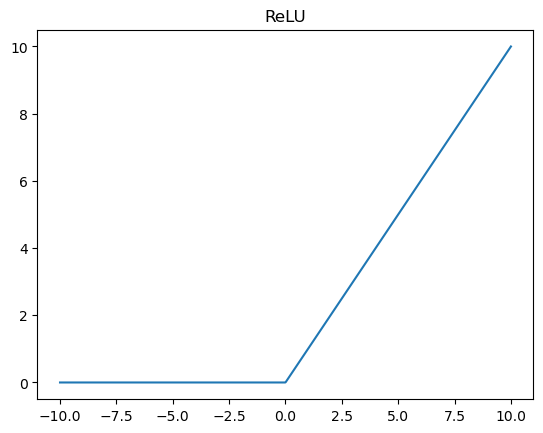

In [26]:


x = np.linspace(-10, 10, 1000)
plt.title('ReLU')
plt.plot(x, np.maximum(x, 0))

Softmax
$$softmax(x_i) = \frac{e^{x_i}}{\Sigma_{j=1}^n e^{x_j}}$$

In [25]:
def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    e = np.exp(x)
    return np.divide(e, np.sum(e, axis=0))

#Derivaje ReLU, potřebné později
def relu_prime(x):
    return x > 0

Ještě než začneme počítat chybovou funkci, potřebujeme převést předpokládaný výstup na matici výstupů. Neboli
\begin{equation}
4 \to
\begin{bmatrix}
0\\
0\\
0\\
1\\
0\\
0\\
0\\
0\\
0\\
0\\
\end{bmatrix}
\end{equation}
Toto udělá funkce numtomat

In [6]:
def numtomat(Y):
    Y_mat = np.zeros((Y.size, 10))
    Y_mat[np.arange(Y.size), Y] = 1
    Y_mat = Y_mat.T
    return Y_mat

In [7]:
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    Y_mat = numtomat(Y)
    dw2 = 2/m * (A2-Y_mat).dot(A1.T)
    #dZ2 = A2 - Y_mat
    #dW2 = 1 / m * dZ2.dot(A1.T)
    #db2 = 1 / m * np.sum(dZ2)
    #dZ1 = W2.T.dot(dZ2) * relu_prime(Z1)
    #dW1 = 1 / m * dZ1.dot(X.T)
    #db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [9]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [10]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [11]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        
        W1 = W1 - alpha * dW1
        b1 = b1 - alpha * db1    
        W2 = W2 - alpha * dW2  
        b2 = b2 - alpha * db2
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [12]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [13]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 100)

Iteration:  0
[3 8 9 ... 8 8 8] [0 7 1 ... 5 6 8]
0.04516949152542373
Iteration:  10
[3 3 4 ... 7 9 3] [0 7 1 ... 5 6 8]
0.09713559322033899


KeyboardInterrupt: 

Prediction:  [2]
Label:  2


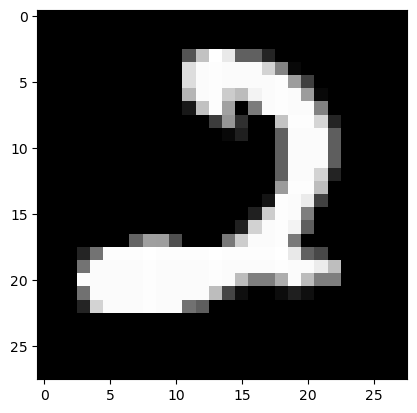

In [18]:
test_prediction(10, W1, b1, W2, b2)